In [92]:
%pip install -U scikit-plot

Requirement already up-to-date: scikit-plot in /opt/anaconda3/lib/python3.8/site-packages (0.3.7)
Note: you may need to restart the kernel to use updated packages.


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor, Ridge)
#from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, f_regression
import scikitplot as skplt
from sklearn.preprocessing import Binarizer

In [94]:
#to Supress scientif format and help in comparison
pd.options.display.float_format = '{:.3f}'.format

In [95]:
df = pd.read_csv('../data/final_eda_base_data.csv', index_col= 0)
X_cleaned_classfn_orig = pd.read_csv('../data/X_cleaned_classfn_based_on_rfe.csv')
y_cleaned_classfn_orig = pd.read_csv('../data/y_cleaned_classfn_based_on_rfe.csv')

In [96]:
df.head(5)

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,...,Channel_Networker,Channel_Private Client Group,Sub channel_Affiliated,Sub channel_DCIO,Sub channel_Global,Sub channel_IBD,Sub channel_NACS,Sub channel_Other,Sub channel_RIA,Sub channel_USBT
0,21.000,38.000,0.000,1.000,5.000,5.000,0.000,1.000,2.000,2.000,...,0,0,0,0,0,0,1,0,0,0
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,1,0,0,0,0
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0,1,0
3,20.000,0.000,2.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,...,0,0,0,0,0,1,0,0,0,0
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0,1,0


In [97]:
X_cleaned_classfn = X_cleaned_classfn_orig.drop('Unnamed: 0', axis =1)

In [98]:
y_cleaned_classfn = y_cleaned_classfn_orig.drop('Unnamed: 0', axis =1)

In [99]:
#df.drop(df.iloc[:, 22:40], inplace = True, axis=1)

In [100]:
# see the increase or decrease in Total sales

In [101]:
total_sales_2018 = df['sales_12M'].sum()
total_sales_2018_curr = df['sales_curr'].sum()
total_sales_2019 = df['sales_2019'].sum()

In [102]:
total_sales_2019 - 2160628225 

-19460114.22761917

In [103]:

#total sales increase in percentage: in 2018 - 2019
((total_sales_2019 - total_sales_2018 - total_sales_2018_curr)/(total_sales_2018 + total_sales_2018_curr))*100

12.406626312261182

In [104]:
((2160628225 - total_sales_2018 - total_sales_2018_curr)/(total_sales_2018+total_sales_2018_curr))*100

13.42823959753883

## As per the given data model predicts 13% increase in the sales from 2018 to 2019! which is significant

In [105]:
#Drop some highly correlated columns - 
#'no_of_sales_12M_10K' , 'no_of_Redemption_12M_10K', 'no_of_assetclass_sales_12M_10K', 'redemption_12M', 'redemption_12M'
#'no_of_fund_sales_12M_10K'

In [106]:
X = df.drop(['no_of_sales_12M_10K', 'no_of_Redemption_12M_10K', 'no_of_assetclass_sales_12M_10K', 'redemption_12M', 'redemption_12M','no_of_fund_sales_12M_10K'], axis=1, inplace= True)

In [107]:
X = df.drop(['Firm name'], axis = 1, inplace= True)

# Prepare the target variable for Regression and Classification

In [108]:
X = df.drop(['sales_2019', 'new_fund_2019'], axis=1)
y_reg = df['sales_2019']
y_cl = df['new_fund_2019']

In [109]:
X = (X-X.mean())/X.std()

In [110]:
#draw histogram to see the distribution

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_funds_sold_12M_1               10005 non-null  float64
 3   no_of_funds_redeemed_12M_1           10005 non-null  float64
 4   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 5   no_of_assetclass_sold_12M_1          10005 non-null  float64
 6   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 7   no_of_assetclass_Redemption_12M_10K  10005 non-null  float64
 8   No_of_fund_curr                      10005 non-null  float64
 9   No_of_asset_curr                     10005 non-null  float64
 10  AUM                                  10005 non-null  float64
 11  sales_curr                  

In [112]:
## Decreasing the random state to 12 yeilds a better performance - .50 score on Test data

# Test-Train Split for Regression

In [113]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=24)

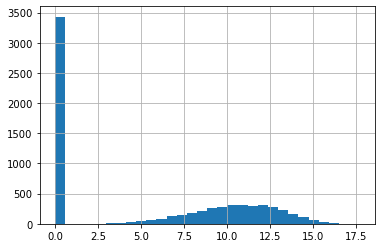

In [114]:
np.log1p(y_train_reg).hist(bins=30);

In [115]:
pred_baseline = np.ones(len(y_train_reg))*np.mean(y_train_reg)

In [116]:
r2_score(y_train_reg, pred_baseline)

0.0

In [117]:
mean_squared_error(y_train_reg, pred_baseline, squared= False)

1209342.029779798

In [118]:
lr_pipeline = make_pipeline(PCA(0.8), LinearRegression())

In [30]:
##Write the X_train to a CSV for easy comparison

In [31]:
X_train.to_excel('../data/X_train-for-comparison.xlsx')

In [32]:
## Selecting K best columns in X_train

In [79]:
X_new = SelectKBest(f_regression, k =16)

In [90]:
# Create and fit SelectKBest selector
selector = SelectKBest(f_regression, k=11)
selector.fit(X_train, y_train_reg)
# Get columns to keep and create new dataframe with those columns
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]

In [91]:
features_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7003 entries, 1666 to 899
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    7003 non-null   float64
 1   no_of_funds_sold_12M_1               7003 non-null   float64
 2   no_of_funds_redeemed_12M_1           7003 non-null   float64
 3   no_of_funds_Redemption_12M_10K       7003 non-null   float64
 4   no_of_assetclass_sold_12M_1          7003 non-null   float64
 5   no_of_assetclass_Redemption_12M_10K  7003 non-null   float64
 6   No_of_fund_curr                      7003 non-null   float64
 7   AUM                                  7003 non-null   float64
 8   sales_curr                           7003 non-null   float64
 9   sales_12M                            7003 non-null   float64
 10  redemption_curr                      7003 non-null   float64
dtypes: float64(11)
memory usage:

In [71]:
X_new.fit_transform(X_train, y_train_reg)

array([[-0.20400321, -0.0312    , -0.57142386, ...,  0.09412646,
        -0.41067622, -0.66609203],
       [-0.19384478, -0.08340525, -0.15123455, ...,  0.09412646,
        -0.41067622,  1.50114399],
       [ 0.9845331 ,  0.14629783,  4.47084787, ...,  0.09412646,
         0.42309318, -0.66609203],
       ...,
       [-0.05162676, -0.08340525, -0.15123455, ...,  0.07446322,
        -0.41067622, -0.66609203],
       [-0.19384478, -0.06774368, -0.15123455, ...,  0.05587641,
         0.42309318, -0.66609203],
       [-0.20400321, -0.10950787, -0.57142386, ...,  0.09412646,
        -0.41067622, -0.66609203]])

In [34]:
#Convert Numpy array to pandas DataFrame to analyze better

In [35]:
df_X_Kbest = X[['no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_funds_sold_12M_1',
                                  'no_of_funds_redeemed_12M_1','no_of_assetclass_sold_12M_1','no_of_assetclass_redeemed_12M_1',
                                  'No_of_fund_curr','No_of_asset_curr',  'AUM',
                                  'sales_curr','sales_12M','redemption_curr']]

## These are the 16 best features as per SelectKBest 
no_of_sales_12M_1 -0.193845 0
no_of_Redemption_12M_1 -0.109508 1
no_of_funds_sold_12M_1 -0.151235 2

no_of_funds_redeemed_12M_1, (-0.625797) 3
no_of_funds_Redemption_12M_10K (-0.447401) 4 # not required as both above are co-related
no_of_assetclass_sold_12M_1 0.212778 5

no_of_assetclass_redeemed_12M_1 -0.866220 6
no_of_assetclass_Redemption_12M_10K  -0.565465 7 # not required as co-related
No_of_fund_curr -0.683590 8

No_of_asset_curr -0.882629 9
AUM,-0.162021 10
sales_curr,	  -0.089097 11

sales_12M,    -0.153225 12
redemption_curr,  0.094081 13
new_Fund_added_12M 0.423093 14

Channel_Networker -0.033175 15

In [37]:
## Evaluate model performance for only the select columns from selectkbest suggestion to see if the score increases

In [120]:
df_X_train_selectKbest = X_train[['no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_funds_sold_12M_1',
                                  'no_of_funds_redeemed_12M_1','no_of_assetclass_sold_12M_1','no_of_assetclass_redeemed_12M_1',
                                  'No_of_fund_curr','No_of_asset_curr',  'AUM',
                                  'sales_curr','sales_12M','redemption_curr']]

In [121]:
df_X_test_selectKbest = X_test[['no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_funds_sold_12M_1',
                                  'no_of_funds_redeemed_12M_1','no_of_assetclass_sold_12M_1','no_of_assetclass_redeemed_12M_1',
                                   'No_of_fund_curr','No_of_asset_curr', 'AUM',
                                  'sales_curr','sales_12M','redemption_curr']]

In [122]:
lr_pipeline.fit(X_train, y_train_reg)

Pipeline(steps=[('pca', PCA(n_components=0.8)),
                ('linearregression', LinearRegression())])

In [123]:
lr_pipeline.fit(df_X_train_selectKbest, y_train_reg)

Pipeline(steps=[('pca', PCA(n_components=0.8)),
                ('linearregression', LinearRegression())])

In [124]:
lr_pipeline.score(df_X_train_selectKbest, y_train_reg)

0.5147333090226286

In [125]:
lr_pipeline.score(df_X_test_selectKbest, y_test_reg)

0.4030098356041324

In [128]:
rf2 = RandomForestRegressor()

In [129]:
rf2.fit(df_X_train_selectKbest, y_train_reg)

RandomForestRegressor()

In [131]:
rf2.score(df_X_train_selectKbest, y_train_reg)

0.8267920606771533

In [130]:
rf2.score(df_X_test_selectKbest, y_test_reg)

0.36279801301425807

In [126]:
lr_pipeline.score(X_train, y_train_reg)

ValueError: X has 34 features, but PCA is expecting 12 features as input.

In [127]:
lr_pipeline.score(X_test, y_test_reg)

ValueError: X has 34 features, but PCA is expecting 12 features as input.

In [48]:
## Total number of Principal components to explain a variation of 80%

In [49]:
lr_pipeline.named_steps['pca'].n_components_

16

In [50]:
np_PCA = lr_pipeline.named_steps['pca'].components_

In [51]:
np_PCA

array([[ 1.99653187e-01,  1.49248724e-01,  3.27223355e-01,
         3.34335967e-01,  3.01587808e-01,  3.12847667e-01,
         3.06364603e-01,  2.91051203e-01,  3.07603284e-01,
         2.56509829e-01,  1.68251715e-01,  1.13583310e-01,
         1.74209154e-01, -1.14197030e-01,  1.95006536e-01,
        -2.03529945e-02, -2.10663394e-02, -1.28885667e-02,
        -2.20358607e-02, -6.51129374e-03, -8.96467935e-02,
        -7.45805185e-03, -5.45070150e-03,  1.26397281e-01,
         4.60346514e-02, -4.80079022e-03, -4.50567195e-03,
        -5.46451123e-03, -5.72025179e-03, -1.39908427e-01,
         1.40424072e-01, -5.40048615e-03,  3.21909930e-04,
         3.69681316e-02],
       [ 9.09755325e-02,  6.73130457e-02,  1.26653405e-01,
         1.14834724e-01,  7.85355282e-02,  8.48097320e-02,
         8.28803963e-02,  5.45880571e-02,  3.97950825e-03,
        -9.89833160e-03, -3.39499059e-03,  3.11475336e-02,
         2.99659910e-02, -3.30574201e-02,  1.21708112e-01,
        -9.40903152e-03, -1.12

In [52]:
## convert the 

In [53]:
df_PCA = pd.DataFrame(np_PCA)

In [54]:
df_PCA.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.200,0.149,0.327,0.334,0.302,0.313,0.306,0.291,0.308,0.257,...,0.046,-0.005,-0.005,-0.005,-0.006,-0.140,0.140,-0.005,0.000,0.037
1,0.091,0.067,0.127,0.115,0.079,0.085,0.083,0.055,0.004,-0.010,...,0.024,-0.078,-0.009,-0.002,-0.019,0.490,-0.487,-0.022,-0.042,0.023
2,0.151,0.238,-0.125,-0.090,0.004,-0.198,-0.190,-0.089,-0.103,-0.141,...,0.085,0.028,0.008,0.005,0.025,0.017,-0.054,0.057,0.086,0.071
3,-0.050,-0.057,-0.015,0.052,0.125,-0.026,0.008,0.053,-0.029,-0.065,...,0.565,-0.005,0.002,0.000,0.214,-0.025,-0.043,0.507,0.009,0.445
4,0.062,0.062,0.047,-0.028,-0.109,0.049,0.006,-0.045,0.041,0.077,...,-0.388,-0.011,-0.003,-0.002,0.476,0.018,-0.009,0.300,-0.012,-0.396


In [55]:
import scikitplot as skplt

In [56]:
import matplotlib.pyplot as plt

In [57]:
y_test_reg_preds = lr_pipeline.predict(X_test)

In [58]:
y_test_reg_preds.sum()

662185417.1772194

In [59]:
#skplt.metrics.plot_lift_curve(y_test, y_test_reg_preds)

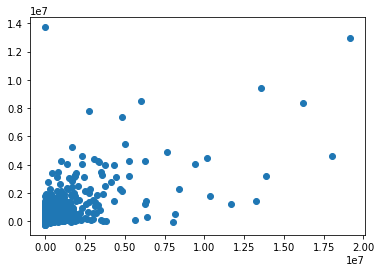

In [60]:
plt.scatter(y_test_reg,y_test_reg_preds)

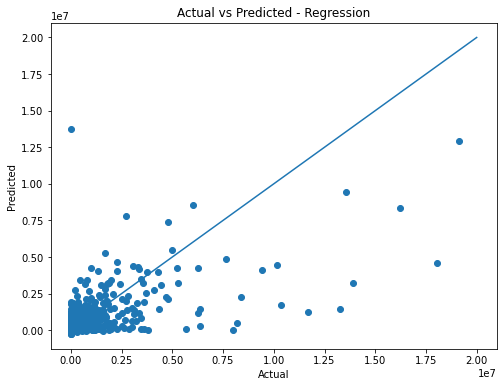

In [61]:
fig, axes = plt.subplots(figsize=(8, 6))

axes.scatter(x=y_test_reg, y=y_test_reg_preds)

axes.plot([0, 20000000], [0,20000000])
axes.set_title("Actual vs Predicted - Regression")
axes.set_xlabel("Actual")
axes.set_ylabel("Predicted");

In [62]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

zsh:1: no matches found: pandas-profiling[notebook]
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## How does our model perform predictions and how far off is it on the Testing data set

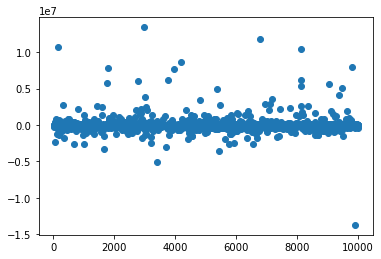

In [63]:
g=plt.plot(y_test_reg - y_test_reg_preds,marker='o',linestyle='')

In [64]:
#skplt.metrics.plot_lift_curve(y_test_cl, y_test_cl_preds);

## make function to output deciles

In [65]:
def output_deciles(model, X, y):
    results = pd.DataFrame(model.predict(X), index = X.index, columns = ['predictions'])
    results['actual'] = y.values
    results['deciles'] = pd.qcut(results['predictions'],10, labels= False)
    #results['contact_id'] = results.index.map(adviser_lookup)
    return results

In [66]:
regression_deciles = output_deciles(lr_pipeline,X_test,y_test_reg )

ValueError: Bin edges must be unique: array([-2.59621087e+05, -2.48920262e+04, -1.37222426e+04, -1.37222426e+04,
        1.64614546e+04,  4.13192589e+04,  7.95254066e+04,  1.38100988e+05,
        2.36232543e+05,  5.08750084e+05,  1.37275200e+07]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
regression_deciles.info()

In [ ]:
regression_deciles.groupby('deciles')[['actual','predictions']].mean()

# Classification models - to predict the probability of adding new funds in 2019

##prepare the test train split for classification

In [ ]:
# what is the X to be used:

In [ ]:
df_X_Kbest.info()

In [ ]:
X_cleaned_classfn.info()

In [ ]:
y_cleaned_classfn.head()

In [ ]:
rfe_support_ = ['no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
       'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
       'No_of_fund_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
       'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MULTIPLE', 'aum_P_MF',
       'aum_P_SMA']

In [ ]:
#y_cl = df['new_fund_2019']
y_cl.head

In [ ]:
#makes the colums 0 or 1 depending on whether values are greater than or equal to 0 - df_X_Kbest

In [ ]:
y_cl_binarized = np.where(y_cl > 0, 1,0)

In [ ]:
y_cl_binarized.size

In [ ]:
pd.value_counts(y_cl_binarized)

In [ ]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X, y_cl_binarized, test_size=0.25, random_state=20)

In [ ]:
rf_cl = RandomForestClassifier(max_depth= 4)

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
#Fit the training set

In [ ]:
rf_cl.fit(X_train_cl, y_train_cl)

In [ ]:
gbc.fit(X_train_cl, y_train_cl)

In [ ]:
#Score the testing set - with max_depth= 5 there could be slight overfitting.

In [ ]:
rf_cl.score(X_test_cl, y_test_cl)

In [ ]:
gbc.score(X_test_cl, y_test_cl)

In [ ]:
#Predict results of Random Forrest
cl_preds_rf = rf_cl.predict(X)

In [ ]:
#Prediction results from Gradient Boosted Trees
cl_preds_gbc = gbc.predict(X)

In [ ]:
#No. of 1's and 0 from Random Forrest
pd.value_counts(cl_preds_rf)

In [ ]:
##No. of 1's and 0 from Gradient Boost for total data set X
pd.value_counts(cl_preds_gbc)

In [ ]:
##No. of 1's and 0 from Gradient Boost for training data set X_train_cl

In [ ]:
cl_preds = pd.Series(gbc.predict(X_train_cl), index=X_train_cl.index)
cl_preds.value_counts()

In [ ]:
##No. of 1's and 0 in target variable - Ground Truth
pd.value_counts(y_cl_binarized)

In [ ]:
#Classification results of Random Forrest
print(classification_report(cl_preds_rf,y_cl_binarized))

In [ ]:
##Classification results of Gradient Boosted trees
print(classification_report(cl_preds_gbc,y_cl_binarized))

In [ ]:
## trying the data set from rfe recommendation

In [ ]:
X_train_cl1, X_test_cl1, y_train_cl1, y_test_cl1 = train_test_split(X_cleaned_classfn, y_cleaned_classfn, test_size=0.30, random_state=20)

In [ ]:
gbc.fit(X_train_cl1, y_train_cl1)

In [ ]:
gbc.score(X_test_cl1, y_test_cl1)

In [ ]:
cl_preds_gbc_rfe = pd.Series(gbc.predict(X_train_cl1), index=X_train_cl1.index)
cl_preds_gbc_rfe.value_counts()

In [ ]:
print(classification_report(cl_preds_gbc_rfe,y_train_cl1))

# Final predictions - combining Regression and Classification

STEP 1 : select the advisors that sold anything - coming from Regression Model